In [1]:
import pandas as pd

In [ ]:
# added_tanimoto_maccs.csv 는 ZN27과 다른 화합물 사이 모든 tanimoto 계수를 포함한 데이터
total_data = pd.read_csv("./added_tanimoto_maccs.csv", index_col=False)
total_data.head()

,Unnamed: 0,smiles,zinc_id,tanimoto_maccs
0,0,C[C@H](NC(=O)c1ccc(-c2ccccc2)nc1O)c1ccc(N2CCN(...,2325719276,0.635135
1,1,C[C@@H](NC(=O)/C=C/c1c(Cl)nc2sccn12)c1ccc(N2CC...,2325719436,0.605263
2,2,C[C@H]1CN(c2ccc(CNC(=O)[C@@H](C)n3ccc4ccccc4c3...,252536409,0.635135
3,3,O=C(NCc1ccc(N2CCOCC2)cc1C(F)(F)F)c1ccc(NCC2CC2...,170617918,0.704225
4,4,COc1ccc(Cl)cc1NC(=O)C1=C(C)NC(=S)N[C@@H]1c1ccc...,867170,0.500000


In [3]:
total_data.drop(columns=["Unnamed: 0"], inplace=True)
total_data.head()

,smiles,zinc_id,tanimoto_maccs
0,C[C@H](NC(=O)c1ccc(-c2ccccc2)nc1O)c1ccc(N2CCN(...,2325719276,0.635135
1,C[C@@H](NC(=O)/C=C/c1c(Cl)nc2sccn12)c1ccc(N2CC...,2325719436,0.605263
2,C[C@H]1CN(c2ccc(CNC(=O)[C@@H](C)n3ccc4ccccc4c3...,252536409,0.635135
3,O=C(NCc1ccc(N2CCOCC2)cc1C(F)(F)F)c1ccc(NCC2CC2...,170617918,0.704225
4,COc1ccc(Cl)cc1NC(=O)C1=C(C)NC(=S)N[C@@H]1c1ccc...,867170,0.500000


In [4]:
total_data_tanimoto = total_data["tanimoto_maccs"]
df_total_tanimoto = pd.DataFrame({"Tanimoto_Similarity_Score":total_data_tanimoto, "Dataset": "Dataset1"})
df_total_tanimoto

,Tanimoto_Similarity_Score,Dataset
0,0.635135,Dataset1
1,0.605263,Dataset1
2,0.635135,Dataset1
3,0.704225,Dataset1
4,0.500000,Dataset1
...,...,...
10301983,0.426966,Dataset1
10301984,0.478261,Dataset1
10301985,0.386364,Dataset1
10301986,0.360825,Dataset1


In [ ]:
# similarity_with_zn27_by_tanimoto_maccs.csv 는 ZN27과 다른 화합물 사이 0.8 이상의 tanimoto 계수를 포함한 데이터터
data = pd.read_csv("./similarity_with_zn27_by_tanimoto_maccs.csv", index_col=False)
data.head()

,smiles,zinc_id,tanimoto_maccs
0,COCCOc1ccc(C(F)(F)F)cc1NC(=O)C1CCN(c2ccc(C#N)c...,24715307,0.802817
1,C#CCOc1ccc(CCNC(=O)Nc2cc(C(F)(F)F)ccc2N2CCOCC2...,72278478,0.852941
2,O=C(COc1ccc(NC(=O)C2(c3ccccc3F)CCOCC2)cc1)N1CCCC1,225570998,0.811594
3,COc1ccc(C(=O)Nc2cc(C(F)(F)F)ccc2N2CCOCC2)c(OC)...,12608018,0.826087
4,COc1cccc(NC(=O)N2CC[C@@H]3CN(c4ccc(C(F)(F)F)cn...,1889197941,0.842857


In [7]:
filtered_tanimoto = data["tanimoto_maccs"]
df_filtered_tanimoto = pd.DataFrame({"Tanimoto_Similarity_Score":filtered_tanimoto, "Dataset": "Dataset2"})
df_filtered_tanimoto

,Tanimoto_Similarity_Score,Dataset
0,0.802817,Dataset2
1,0.852941,Dataset2
2,0.811594,Dataset2
3,0.826087,Dataset2
4,0.842857,Dataset2
...,...,...
5154,0.830986,Dataset2
5155,0.805970,Dataset2
5156,0.811594,Dataset2
5157,0.819444,Dataset2


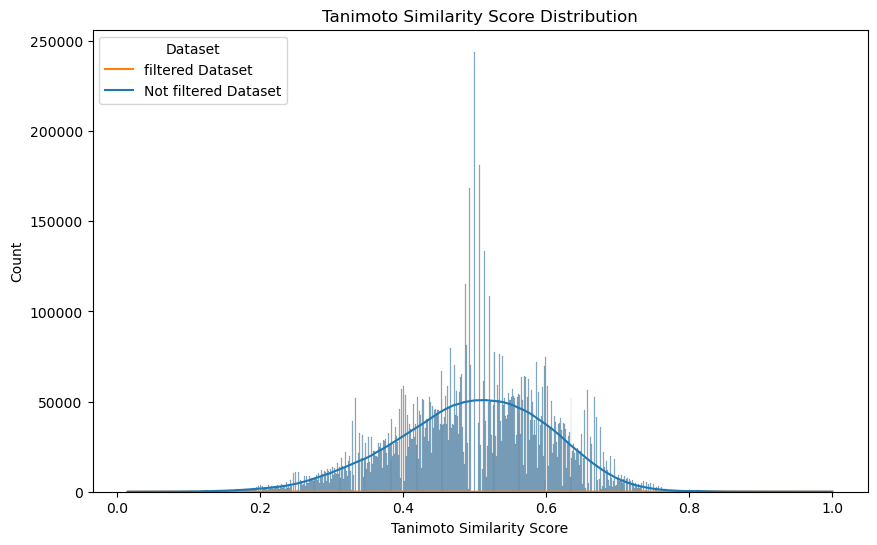

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임 병합
df_tanimoto = pd.concat([df_total_tanimoto, df_filtered_tanimoto])

# 히스토그램 생성
plt.figure(figsize=(10, 6))
sns.histplot(data=df_tanimoto, x='Tanimoto_Similarity_Score', hue='Dataset', stat='count', common_norm=False, kde=True, multiple="stack")
plt.title('Tanimoto Similarity Score Distribution')
plt.xlabel('Tanimoto Similarity Score')
plt.ylabel('Count')
plt.legend(loc='upper left', labels=["Filtered Dataset", "Not Filtered Dataset"])
plt.savefig("Merged_Tanimoto_Similarity_distribution_image.png")
plt.show()
# graph legend 중 filterd dataset 은 0.8 이상 tanimoto 계수를 가진 화합물만을 가지는 데이터, not filtered dataset 은 모든 화합물을 가지는 데이터를 나타 냄.


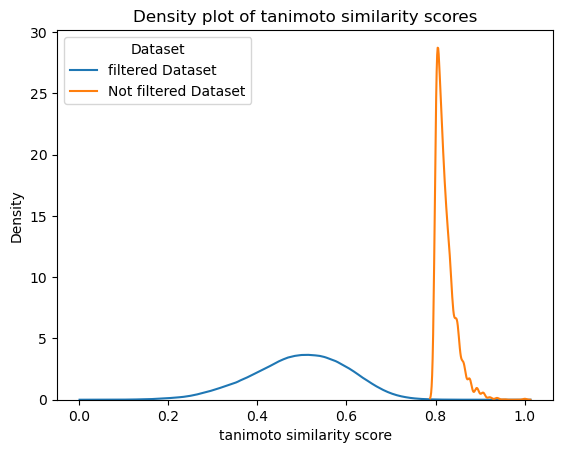

In [22]:
sns.kdeplot(total_data["tanimoto_maccs"],) # blue
sns.kdeplot(data["tanimoto_maccs"],) # orange
plt.title("Density plot of tanimoto similarity scores")
plt.xlabel("tanimoto similarity score")
plt.ylabel("Density")
plt.legend(title='Dataset', loc='upper left', labels=["filtered Dataset", "Not filtered Dataset"])
plt.savefig("Merged_Tanimoto_similarity_distribution_2_graph")
plt.show()

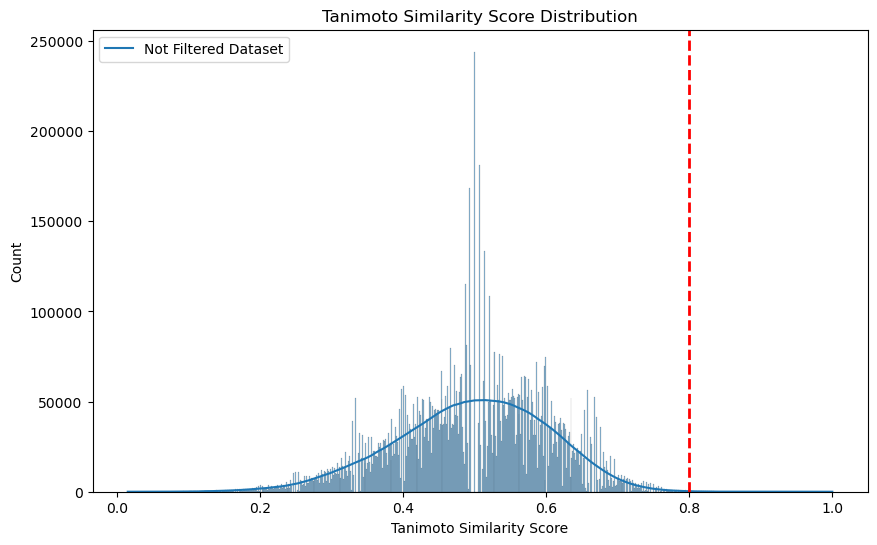

In [5]:
# total Data 만 tanimoto graph 그리기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임 병합
#df_tanimoto = pd.concat([df_total_tanimoto, df_filtered_tanimoto])

# 히스토그램 생성
plt.figure(figsize=(10, 6))
sns.histplot(data=df_total_tanimoto, x='Tanimoto_Similarity_Score', hue='Dataset', stat='count', common_norm=False, kde=True, multiple="stack")
plt.axvline(x=0.8, color='red', linestyle='--', linewidth=2)
plt.title('Tanimoto Similarity Score Distribution')
plt.xlabel('Tanimoto Similarity Score')
plt.ylabel('Count')
plt.legend(loc='upper left', labels=["Not Filtered Dataset"])
plt.savefig("Total_Tanimoto_Similarity_distribution_image.png")
plt.show()



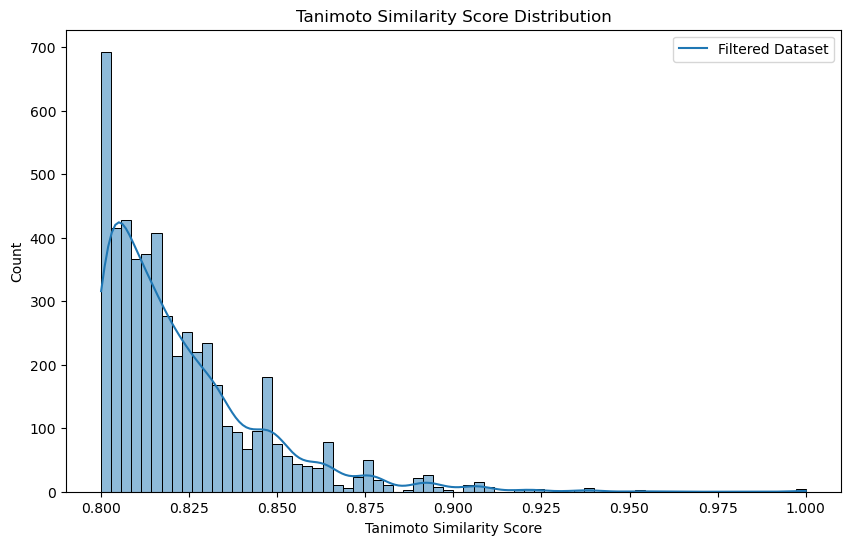

In [8]:
# filtered Data 만 tanimoto graph 그리기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임 병합
#df_tanimoto = pd.concat([df_total_tanimoto, df_filtered_tanimoto])

# 히스토그램 생성
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered_tanimoto, x='Tanimoto_Similarity_Score', hue='Dataset', stat='count', common_norm=False, kde=True, multiple="stack")
plt.title('Tanimoto Similarity Score Distribution')
plt.xlabel('Tanimoto Similarity Score')
plt.ylabel('Count')
plt.legend(loc='upper right', labels=["Filtered Dataset"])
plt.savefig("Filtered_Tanimoto_Similarity_distribution_image.png")
plt.show()

